In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
from scipy import stats
from sklearn.metrics import classification_report  #这个包是评价报告
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  #加油！！！珍惜时间～～～
import seaborn as sns

In [2]:
data_1=sio.loadmat('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex8-anomaly detection and recommendation/data/ex8data1.mat')
data_x=data_1['X']
df_1=pd.DataFrame(data_x,columns=['Latency', 'Throughput'])
test_x=pd.DataFrame(data_1['Xval'],columns=['Latency', 'Throughput'])
test_y=pd.DataFrame(data_1['yval'],columns=['anomal'])
test_x.head()

,Latency,Throughput
0,15.790260,14.921024
1,13.639619,15.329955
2,14.865899,16.473865
3,13.584676,13.989306
4,13.464042,15.635330


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


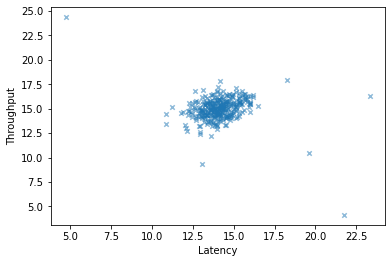

In [3]:
sns.regplot('Latency', 'Throughput', marker='x',data=df_1, fit_reg=False,scatter_kws={"s":20,"alpha":0.5})
plt.show()

In [39]:
def get_mean(X):    # X: dataframe nxk
    m=X.shape[0]
    return np.sum(X.values,axis=0)/m   # sum along column
    
def get_var(X,mean):
    m=X.shape[0]
    array_temp=X.values-np.array([list(mean) for _ in range(m)])
    return np.sum(np.power(array_temp,2),axis=0)/m

In [40]:
get_mean(df_1)

array([14.11222578, 14.99771051])

In [41]:
get_var(df_1,get_mean(df_1))

array([1.83263141, 1.70974533])

In [3]:
def get_thre(train_x,test_x,test_y):   #多元正态分布
    cov_array=np.cov(train_x.T)   # k*k
    mean=train_x.mean(axis=0)     # get 协方差矩阵 and mean based on train data
    
    multi_normal=stats.multivariate_normal(mean, cov_array)
    Pdf=multi_normal.pdf(test_x)     #get probability at every point

    thre_list=np.linspace(np.min(Pdf), np.max(Pdf), num=10000)   # the value range of thre
    score=[]
    for thre in thre_list:
        y_pre=(Pdf<=thre).astype('int')  # <= :y =1 ; >:y=0
        score.append(f1_score(y_pre,test_y))
    
    max_index= np.argmax(score)
    return Pdf[max_index],score[max_index]  

In [9]:
def predict(train_x,test_x,test_y,E):
    # first combin train and test x
    data_x=np.concatenate((train_x,test_x), axis=0)
    # put in normal model 
    cov_array=np.cov(data_x.T)  
    mean=data_x.mean(axis=0)     # get 协方差矩阵 and mean based on train data
    model=stats.multivariate_normal(mean, cov_array)
    # predict using test x
    pval =model.pdf(test_x)
    y_pred = (pval <= E).astype('int')
    print(classification_report(test_y, y_pred))

    return model, y_pred

In [32]:
get_thre(df_1,test_x,test_y)

(0.07352084871604168, 0.8750000000000001)

In [2]:
data_2=sio.loadmat('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex8-anomaly detection and recommendation/data/ex8data2.mat')
train_2=pd.DataFrame(data_2['X'])
test_x_2=pd.DataFrame(data_2['Xval'])
test_y_2=pd.DataFrame(data_2['yval'])

In [10]:
e_value,F_score=get_thre(train_2,test_x_2,test_y_2)

In [12]:
multi_normal, y_pred=predict(train_2,test_x_2,test_y_2,e_value)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84        90
           1       0.27      0.90      0.42        10

    accuracy                           0.75       100
   macro avg       0.63      0.82      0.63       100
weighted avg       0.91      0.75      0.80       100

